# Starting Point#

In [ ]:
# upload dataset
from google.colab import files
upl = files.upload()

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read train data
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

df_train.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# shape of train and test data
print("Train Shape:", df_train.shape)
print("Test Shape:", df_test.shape)

Train Shape: (23524, 13)
Test Shape: (10086, 12)


In [ ]:
# data description
df_train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [ ]:
# check for categorical values
df_train.select_dtypes(object).columns

Index(['country', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [ ]:
# check for missing values
df_train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

# Visualizations

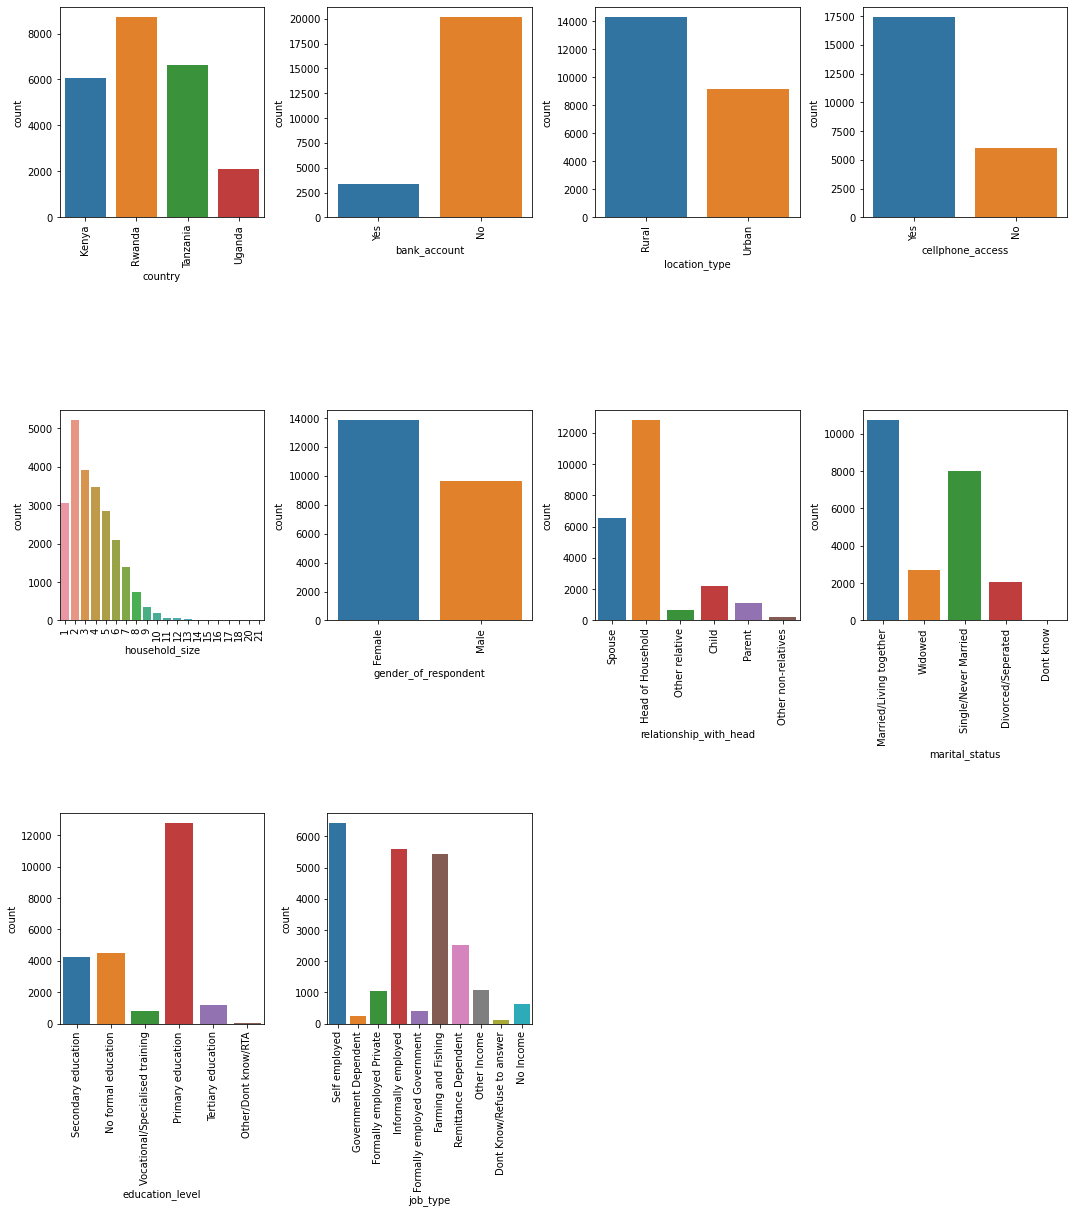

In [ ]:
# drop unneeded features
df_plot = df_train.drop(columns=['uniqueid','age_of_respondent','year'])
# plot multipe countplots
plt.figure(figsize=(15,20))
for index,column in enumerate(df_plot):
    plt.subplot(4,4,index+1)
    sns.countplot(data=df_plot,x=column)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

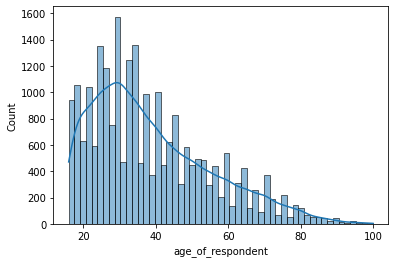

In [ ]:
# age distribution
sns.histplot(df_train['age_of_respondent'], kde=True)

Bank Account Counts:
 No     20212
Yes     3312
Name: bank_account, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


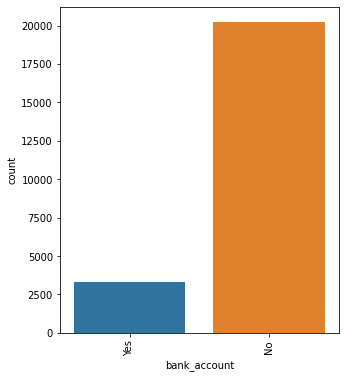

In [ ]:
# bank account countplot
plt.figure(figsize=(5, 6))
plt.xticks(rotation=90)
sns.countplot(df_train['bank_account'])

# value count of bank accounts
print("Bank Account Counts:"+"\n",df_train['bank_account'].value_counts())

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Text(0.5, 0, 'Does Not Have Bank Account')

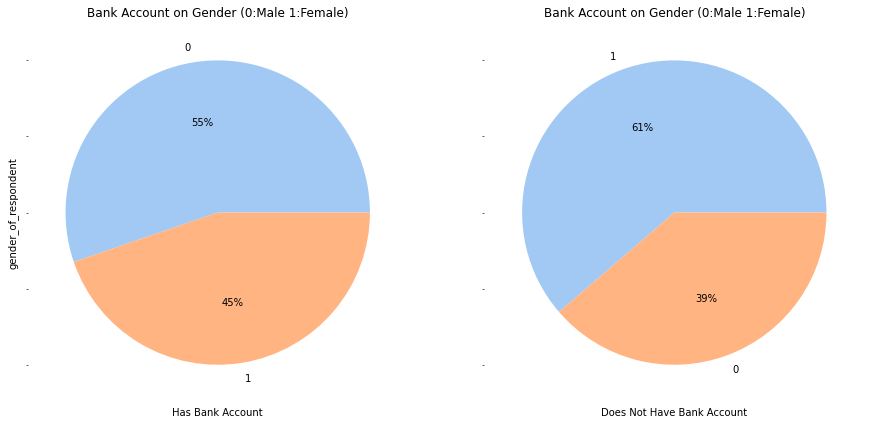

In [ ]:
# get percentage gender of those who have bank accounts and those who do not

gender_bank = df_train[["bank_account","gender_of_respondent"]]  # get features 
No_bank = gender_bank.query('bank_account == "No"')               # data of gender with no bank acc
Yes_bank = gender_bank.query('bank_account == "Yes"')            # data of gender with bank acc

Yes_bank.bank_account.replace("Yes",1,inplace=True)               # replace string data to numerical
No_bank.bank_account.replace("No",0,inplace=True)

Yes_bank.gender_of_respondent.replace("Male",0,inplace=True)       # replace string data to numerical
Yes_bank.gender_of_respondent.replace("Female",1,inplace=True)

No_bank.gender_of_respondent.replace("Male",0,inplace=True)
No_bank.gender_of_respondent.replace("Female",1,inplace=True)
colors = sns.color_palette("pastel")[0:5]


# Gender plots based on Bank Account Presence
fig,axes = plt.subplots(1,2,figsize = (15,8),sharey=True)

Yes_bank.gender_of_respondent.value_counts().plot(ax = axes[0],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[0].set_title("Bank Account on Gender (0:Male 1:Female)")
axes[0].set_xlabel('Has Bank Account')

No_bank.gender_of_respondent.value_counts().plot(ax = axes[1],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[1].set_title("Bank Account on Gender (0:Male 1:Female)")
axes[1].set_xlabel('Does Not Have Bank Account')

# Data Preprocessing


In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
# drop unneeded features
df_train = df_train.drop(columns=['year', 'uniqueid'])


In [ ]:
cat_columns = df_train.select_dtypes(exclude='number').columns
cat_columns

Index(['country', 'bank_account', 'location_type', 'cellphone_access',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [ ]:
# instantiate
lc = LabelEncoder()
# encode
for i in cat_columns:
  df_train[i] = lc.fit_transform(df_train[i])

df_train.head(5)

,country,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,1,0,1,3,24,0,5,2,3,9
1,0,0,0,0,5,70,0,1,4,0,4
2,0,1,1,1,5,26,1,3,3,5,9
3,0,0,0,1,5,34,0,1,2,2,3
4,0,0,1,0,8,26,1,0,3,2,5


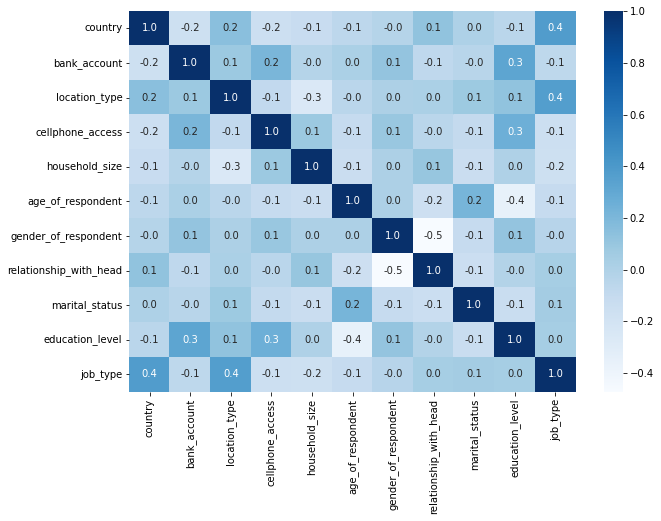

In [ ]:
# correlation matrix
kor = df_train.corr()
# heatmap
plt.figure(figsize=(10,7))
sns.heatmap(kor,annot=True,cmap='Blues', fmt='.1f')

# Modeling and Smote

In [ ]:
# split the data
from sklearn.model_selection import train_test_split

# target and features
target = df_train['bank_account']
features = df_train.drop(columns=['bank_account'])
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size=.2, random_state=42 )


Always perform smote balancing on the train test after splitting the data

In [ ]:
from imblearn.over_sampling import SMOTE
# instantiate
sm = SMOTE(random_state=42, sampling_strategy=1)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
x_train_scaled = Sc.fit_transform(X_train)
x_test_scaled = Sc.transform(X_test)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_scaled, Y_train)
log_pred = logreg.predict(x_test_scaled)

# evaluate
from sklearn.metrics import accuracy_score,f1_score, recall_score

log_score = accuracy_score(Y_test, log_pred)
f1_val = f1_score(Y_test, log_pred)
recall_val = recall_score(Y_test, log_pred)
print('Algorithm accuracy:',log_score)
print('F1 score:',f1_val)
print('Recall score:',recall_val)


Algorithm accuracy: 0.7275239107332625
F1 score: 0.4312333629103815
Recall score: 0.7570093457943925


In [ ]:
# SVM
from sklearn.svm import SVC
# list to store svc performance
performance_monitor = []
#loop
for i in range(1,11):
  # instantiate svc model
  svc_model = SVC(C=i)
  svc_model.fit(x_train_scaled, Y_train)
  svc_pred = svc_model.predict(x_test_scaled)
  svm_score = accuracy_score(Y_test, svc_pred)
  performance_monitor.append(svm_score)


performance_monitor
print('Best performed, C=6',performance_monitor[5])

Best performed, C=6 0.7515409139213602


In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(x_train_scaled, Y_train)
rfc_pred = rfc.predict(x_test_scaled)


rfc_score = accuracy_score(Y_test, rfc_pred)
f1_val = f1_score(Y_test, rfc_pred)
recall_val = recall_score(Y_test, rfc_pred)


print('Algorithm accuracy:',rfc_score)
print('F1 score:',f1_val)
print('Recall score:',recall_val)

Algorithm accuracy: 0.8089266737513284
F1 score: 0.45082467929138664
Recall score: 0.5747663551401869


In [ ]:
# Xgboost 
from xgboost import XGBClassifier
xgb = XGBClassifier()
# xgb = XGBClassifier(max_depth = 4, learning_rate=.01, n_estimators=300)
xgb.fit(x_train_scaled, Y_train)
xgb_pred = xgb.predict(x_test_scaled)

xgb_score = accuracy_score(Y_test, xgb_pred)
f1_val = f1_score(Y_test, xgb_pred)
recall_val = recall_score(Y_test, xgb_pred)


print('Algorithm accuracy:',xgb_score)
print('F1 score:',f1_val)
print('Recall score:',recall_val)

Algorithm accuracy: 0.7749202975557917
F1 score: 0.4760019792182088
Recall score: 0.7492211838006231


In [ ]:
# LightGBM
import lightgbm

lgb = lightgbm.LGBMClassifier()
lgb.fit(x_train_scaled, Y_train)
lgb_pred = lgb.predict(x_test_scaled)

lgb_score = accuracy_score(Y_test, lgb_pred)
f1_val = f1_score(Y_test, lgb_pred)
recall_val = recall_score(Y_test, lgb_pred)


print('Algorithm accuracy:',lgb_score)
print('F1 score:',f1_val)
print('Recall score:',recall_val)

Algorithm accuracy: 0.785759829968119
F1 score: 0.47717842323651455
Recall score: 0.7165109034267912


# Results

In [ ]:
# Plain Accuracy comparison table
best_model_table = pd.DataFrame({'Logistic_R':[log_score], 'SVM':[performance_monitor[5]], 'Random Forest':[rfc_score],
                                 'XGBoost':[xgb_score], 'LightGB':[lgb_score]},index=['Accuracy'])

best_model_table

,Logistic_R,SVM,Random Forest,XGBoost,LightGB
Accuracy,0.727524,0.751541,0.808927,0.77492,0.78576
